# Imagenes como datos


## Visualización
Para mostrar datos de imágenes, confiará en la biblioteca Matplotlib de Python y, específicamente, usará el submódulo pyplot de matplotlib, que contiene muchos comandos de trazado. Algunos de estos comandos le permiten mostrar el contenido de las imágenes almacenadas en matrices.

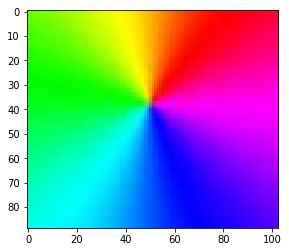

In [8]:
# Esta linea es para los juoyter notebooks y agrega el grafico a la salida
%matplotlib inline
# Importamos plt
import matplotlib.pyplot as plt
 
# Cargamos la imagen con imread
data = plt.imread('imagen.jpg')

# Display the image
plt.imshow(data)
plt.show()

## Cambiando imagenes
To modify an image, you can modiy the existing numbers in the array. In a color image, you can change the values in one of the color channels without affecting the other colors, by indexing on the last dimension of the array.

In [9]:
data.shape

(89, 103, 3)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


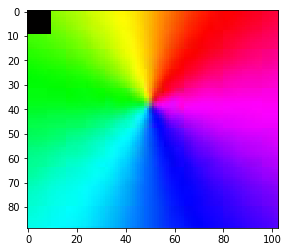

In [14]:
#print(data.flags)
# actualizamos el flag de numpy para editar arrays
data.flags.writeable = True

# Set the red channel in this part of the image to 1
data[:10, :10, 0] = 1

# Set the green channel in this part of the image to 0
data[:10, :10, 2] = 0

# Set the blue channel in this part of the image to 0
data[:10, :10, 1] = 0

# Visualize the result
plt.imshow(data)
plt.show()

# Classifying images

# Using one-hot encoding to represent images
Neural networks expect the labels of classes in a dataset to be organized in a one-hot encoded manner: each row in the array contains zeros in all columns, except the column corresponding to a unique label, which is set to 1.

The fashion dataset contains three categories:

Shirts
Dresses
Shoes

In [3]:
import numpy as np
# Numero de clases a identificar
n_categories = 3
 
# Valores para las categorias
categories = np.array(["shirt", "dress", "shoe"])

labels = np.array(['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress'])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii , jj] = 1

ohe_labels

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

## Evaluando un clasificador

In [8]:
# Calculate the number of correct predictions
number_correct = (test_labels * predictions).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct/len(predictions)
print(proportion_correct)

NameError: name 'test_labels' is not defined

# Clasificación con Keras

In [ ]:
model.add(Dense(10, activation='relu',   input_shape=(784,))) 
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy']) 

In [ ]:
train_data = train_data.reshape((50, 784))

In [ ]:
model.fit(train_data, train_labels,  validation_split=0.2, epochs=3) 

## Construyendo la red neuronal
We will use the Keras library to create neural networks and to train these neural networks to classify images. These models will all be of the Sequential type, meaning that the outputs of one layer are provided as inputs only to the next layer.

In this exercise, you will create a neural network with Dense layers, meaning that each unit in each layer is connected to all of the units in the previous layer. For example, each unit in the first layer is connected to all of the pixels in the input images. The Dense layer object receives as arguments the number of units in that layer, and the activation function for the units. For the first layer in the network, it also receives an input_shape keyword argument.

In [6]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation="relu", input_shape=(784,)))

# Second layer
model.add(Dense(10, activation="relu"))

# Output layer
model.add(Dense(3 ,activation="softmax"))

Using TensorFlow backend.


# Compilando la red
Once you have constructed a model in Keras, the model needs to be compiled before you can fit it to data. This means that you need to specify the optimizer that will be used to fit the model and the loss function that will be used in optimization. Optionally, you can also specify a list of metrics that the model will keep track of. For example, if you want to know the classification accuracy, you will provide the list ['accuracy'] to the metrics keyword argument.

In [7]:
model.compile(optimizer="adam", loss='categorical_crossentropy',  metrics=['accuracy'])

## Fitting a neural network model to clothing data
In this exercise, you will fit the fully connected neural network that you constructed in the previous exercise to image data. The training data is provided as two variables: train_data that contains the pixel data for 50 images of the three clothing classes and train_labels, which contains one-hot encoded representations of the labels for each one of these 50 images. Transform the data into the network's expected input and then fit the model on training data and training labels.

The model you compiled in the previous exercise, and train_data and train_labels are available in your workspace.

In [10]:
# Reshape the data to two-dimensional array
#train_data = train_data.reshape(50, 784) 

# Fit the model
#model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

## Cross-validation for neural network evaluation
To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

The model you fit in the previous exercise, and test_data and test_labels are available in your workspace.

In [1]:
# Reshape test data
#test_data = test_data.reshape(10, 784) 

# Evaluate the model
#model.evaluate(test_data, test_labels)
#